# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**KHOLISWA, NTSHINGA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
# NumPy is a fundamental package for scientific computing in Python. It will provides support for large, multi-dimensional arrays 
# and matrices,along with a collection of mathematical functions to operate on these arrays.

import pandas as pd
# Pandas is a powerful library for data manipulation and analysis. It will provides data structures like DataFrames and Series,
# which allow you to easily manipulate and analyze tabular data.

import matplotlib.pyplot as plt
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. It can be used to 
# create a wide variety of plots, including line plots, bar plots, histograms, and scatter plots.

import seaborn as sns
# Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing 
# attractive and informative statistical graphics.

import sklearn
# Scikit-learn is a machine learning library for Python. It provides simple and efficient tools for data mining and data 
# analysis, built on NumPy, SciPy, and Matplotlib.

# Libraries for data preparation and model building

import sklearn
# Scikit-learn provides a wide range of tools for machine learning tasks such as classification, regression, clustering, and 
# dimensionality reduction. It also includes utilities for preprocessing data, such as scaling, encoding categorical variables,
# and handling missing values.

from sklearn import preprocessing
# This module in scikit-learn provides several functions for preprocessing data before using it to train machine learning models. 
# These functions help in transforming raw data into a format that is suitable for training models. 

from sklearn.model_selection import train_test_split
# The train_test_split function from the sklearn.model_selection module is used to split a dataset into training and testing sets. 
# This is a common practice in machine learning to evaluate the performance of a model.

from sklearn.preprocessing import StandardScaler
# The StandardScaler works by computing the mean and standard deviation on a training set so as to be able to later reapply the 
# same transformation on the testing set. This ensures that the mean of each feature is 0 and the variance is 1, 
# which helps standardize the scale of the features.

from sklearn.linear_model import LinearRegression
# LinearRegression is a class in scikit-learn used to perform linear regression. Linear regression is a simple and commonly used 
# technique for modeling the relationship between a dependent variable (target) and one or more independent variables (features). 
# The goal of linear regression is to find the best-fitting linear relationship between the features and the target. 

from sklearn.tree import DecisionTreeRegressor
# DecisionTreeRegressor is a class in scikit-learn used to perform decision tree regression. Decision tree regression is a type 
# of regression analysis where the predictor variables are mapped to a target variable by following a decision tree. The decision 
# tree is constructed by recursively splitting the data into subsets based on the value of a feature, such that the target 
# variable is as homogeneous as possible within each subset.

from sklearn.metrics import mean_absolute_error ,  r2_score
# mean_absolute_error is a function from the sklearn.metrics module in scikit-learn used to compute the mean absolute error (MAE)
# between the actual and predicted values of a regression problem. MAE is a common metric used to evaluate the performance of 
# regression models. It measures the average magnitude of the errors in a set of predictions, without considering their 
# direction (i.e., whether they are overestimates or underestimates).

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT =

import random
# The random module in Python provides functions for generating random numbers. It can be used to perform various randomization 
# tasks, such as generating random integers, shuffling sequences, and selecting random elements from a list.

#import tensorflow as tf
# tensorflow is a popular open-source machine learning library developed by Google. It is designed to provide a flexible and 
# efficient framework for building and training various machine learning models, including deep learning models. TensorFlow is
# widely used in both research and industry for tasks such as image classification, natural language processing, and 
# reinforcement learning.

# import torch
# torch is a popular open-source machine learning library developed by Facebook's AI Research lab (FAIR). It provides a flexible 
# and efficient framework for building and training various machine learning models, including deep learning models. Torch is 
# widely used in both research
# and industry for tasks such as image and speech recognition, natural language processing, and reinforcement learning.

# Set random seed for Python random library
random_seed = 42
random.seed(random_seed)

# Set random seed for NumPy
np.random.seed(random_seed)

# Set random seed for TensorFlow
#tf.random.set_seed(random_seed)

# Set random seed for PyTorch
# torch.manual_seed(random_seed)

# Set global constants
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [26]:
# df = # load the data

df = pd.read_csv('df_train.csv')
df.head(10)
#df.describe()

Unnamed: 0            time  Madrid_wind_speed Valencia_wind_deg  \
0           0   1/1/2015 3:00           0.666667           level_5   
1           1   1/1/2015 6:00           0.333333          level_10   
2           2   1/1/2015 9:00           1.000000           level_9   
3           3  1/1/2015 12:00           1.000000           level_8   
4           4  1/1/2015 15:00           1.000000           level_7   
5           5  1/1/2015 18:00           1.000000           level_7   
6           6  1/1/2015 21:00           1.000000           level_8   
7           7   1/2/2015 0:00           1.000000           level_9   
8           8   1/2/2015 3:00           1.000000           level_9   
9           9   1/2/2015 6:00           1.000000           level_9   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   
5             0.0             1.000000         69.666667        67.333333   
6             0.0             1.000000         83.666667        63.333333   
7             0.0             1.000000         83.666667        64.000000   
8             0.0             1.000000         86.000000        63.333333   
9             0.0             1.333333         87.000000        63.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0           0.000000           1.000000  ...       265.938000      281.013000   
1           0.000000           1.000000  ...       266.386667      280.561667   
2           0.000000           1.000000  ...       272.708667      281.583667   
3           0.000000           1.000000  ...       281.895219      283.434104   
4           2.000000           0.333333  ...       280.678437      284.213167   
5          12.333333           0.666667  ...       274.639229      284.165625   
6          16.333333           1.000000  ...       268.287000      283.420333   
7           8.666667           1.333333  ...       266.882333      282.474000   
8           5.333333           1.000000  ...       266.226667      281.726667   
9          15.333333           1.000000  ...       266.878000      281.803000   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   
5       277.919000   277.919000          284.165625       277.919000   
6       274.295437   274.295437          283.420333       274.295437   
7       272.903167   272.903167          282.474000       272.903167   
8       271.780115   271.780115          281.726667       271.780115   
9       271.673667   271.673667          281.803000       271.673667   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  
5        282.077844  274.639229       274.639229        6842.000000  
6        277.637000  268.287000       268.287000       10760.333330  
7        276.457333  266.882333       266.882333       10866.000000  
8        276.151667  266.226667       266.226667       -1850.333333  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


   Unnamed: 0            time  Madrid_wind_speed Valencia_wind_deg  \
0           0   1/1/2015 3:00           0.666667           level_5   
1           1   1/1/2015 6:00           0.333333          level_10   
2           2   1/1/2015 9:00           1.000000           level_9   
3           3  1/1/2015 12:00           1.000000           level_8   
4           4  1/1/2015 15:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.00

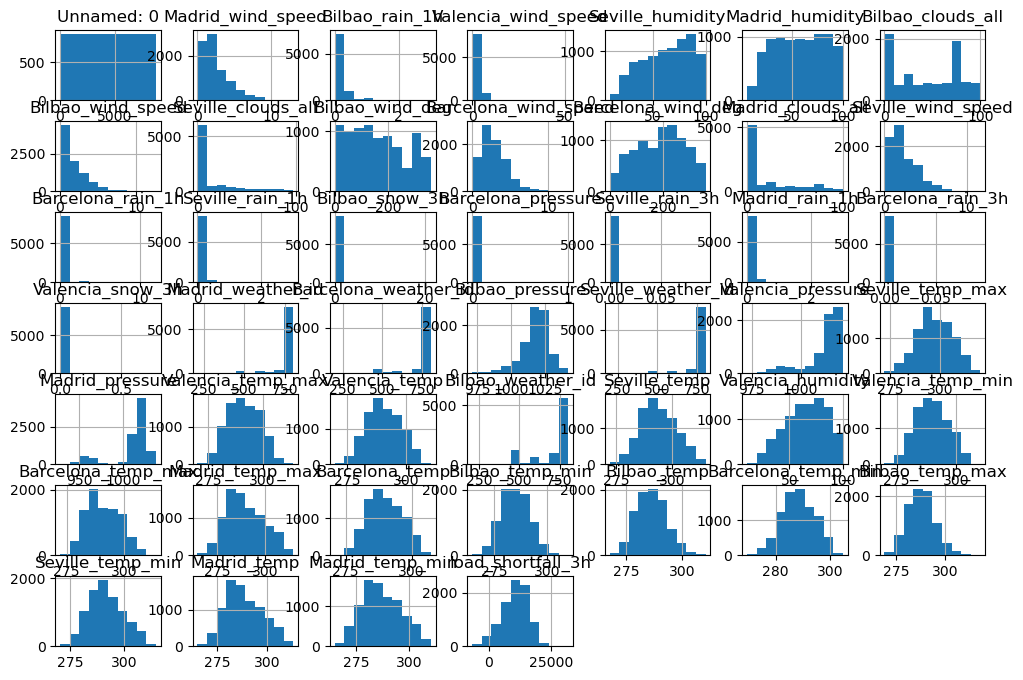

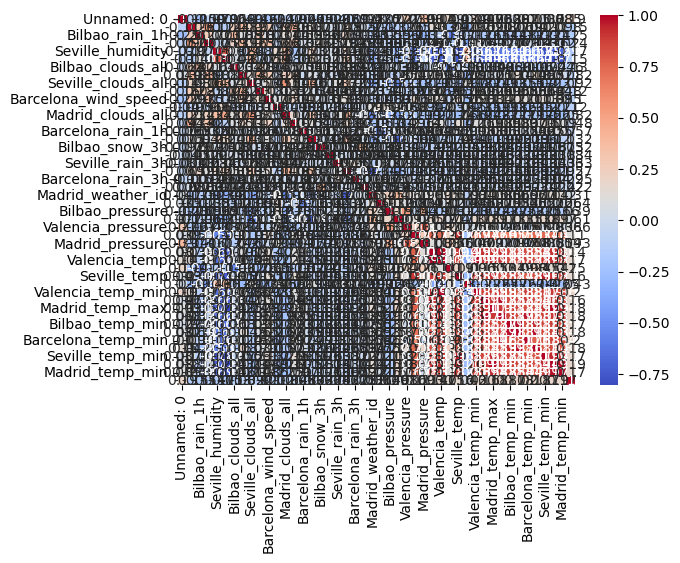

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

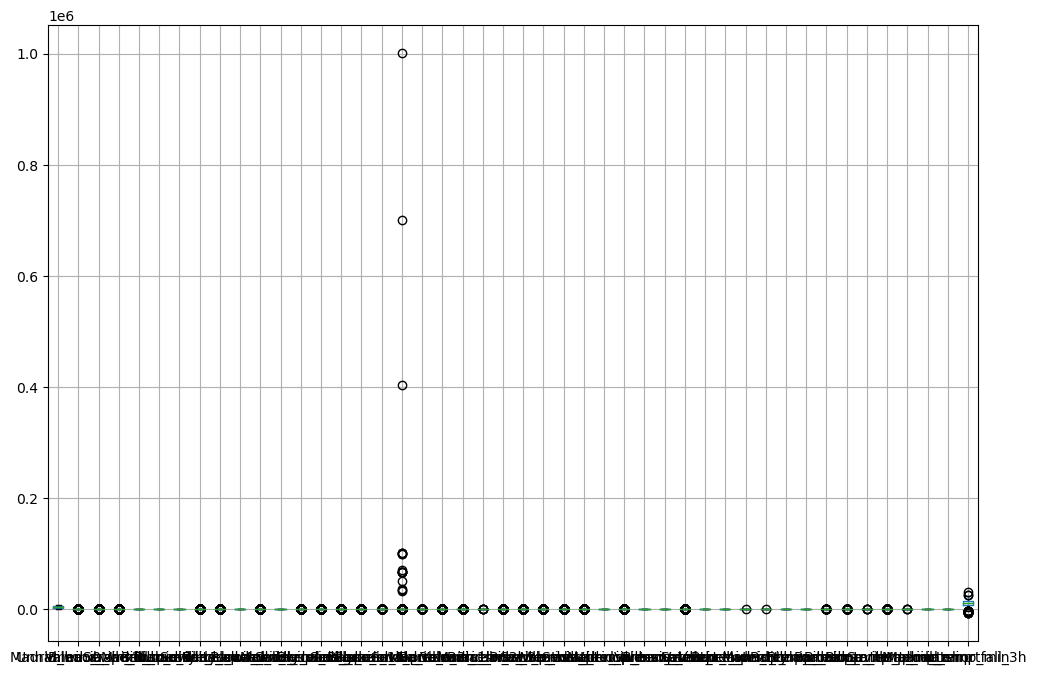

KeyError: "None of [Index(['numerical_column'], dtype='object')] are in the [columns]"

In [3]:
# look at data statistics

# Load the DataFrame
df = pd.read_csv('df_train.csv')

# Data Overview
print(df.head())
print(df.info())

# Descriptive Statistics
print(df.describe())

# Data Distribution (Histograms)
df.hist(figsize=(12, 8))
plt.show()

# Correlation Analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
correlation_matrix = df.corr()
plt.show()

# Handling Missing Values
print(df.isnull().sum())

# Outlier Detection (Boxplots)
df.boxplot(figsize=(12, 8))
plt.show()

# Data Transformation (if needed)

# For example, encoding categorical variables
df_encoded = pd.get_dummies(df)

# Scaling numerical variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['numerical_column']])

# Remember to handle missing values and outliers appropriately based on your analysis



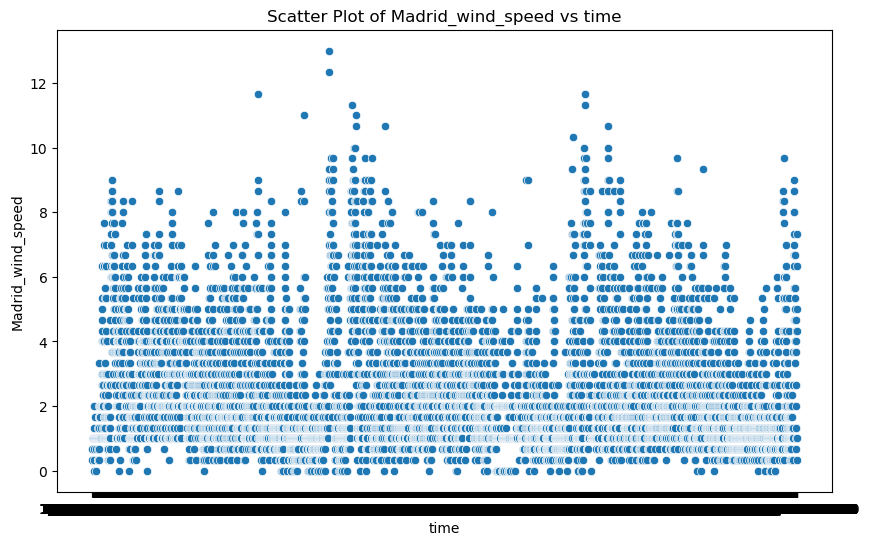

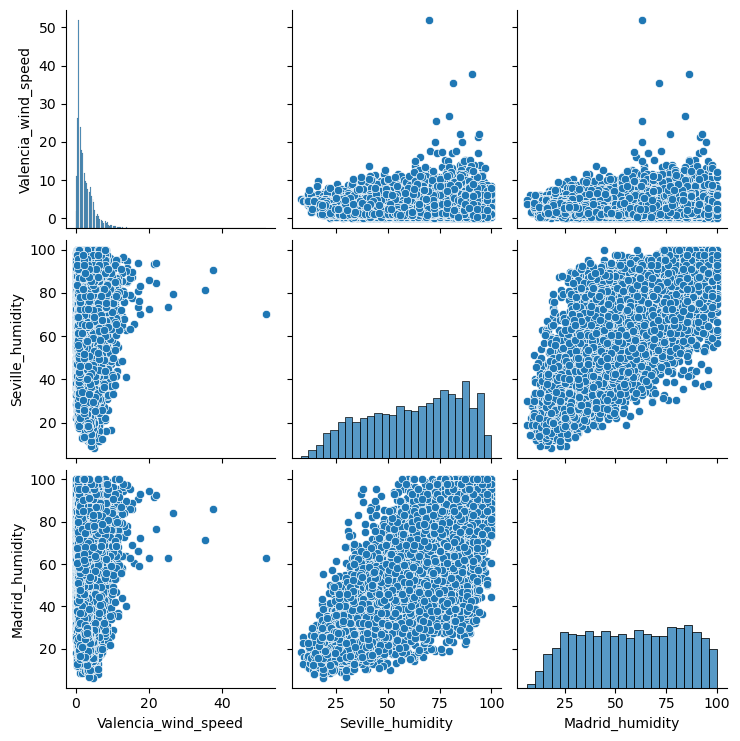

ValueError: Could not interpret input 'load_shortfall_3h '

<Figure size 1000x600 with 0 Axes>

In [5]:
# plot relevant feature interactions

# Load the DataFrame
df = pd.read_csv('df_train.csv')

# Example: Scatter plot of 'feature1' vs 'feature2'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='Madrid_wind_speed', data=df)
plt.title('Scatter Plot of Madrid_wind_speed vs time')
plt.show()

# Example: Pair plot of numerical features
sns.pairplot(df[['Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity']])
plt.show()

# Example: Bar plot of 'categorical_feature' vs 'numerical_feature'
plt.figure(figsize=(10, 6))
sns.barplot(x='load_shortfall_3h ', y='Madrid_temp_min ', data=df)
plt.title('Bar Plot of Categorical Feature vs Numerical Feature')
plt.show()

# Example: Box plot of 'categorical_feature' vs 'numerical_feature'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bilbao_wind_speed ', y='Madrid_temp_max ', data=df)
plt.title('Box Plot of Categorical Feature vs Numerical Feature')
plt.show()

# Example: Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


                      Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Sevill

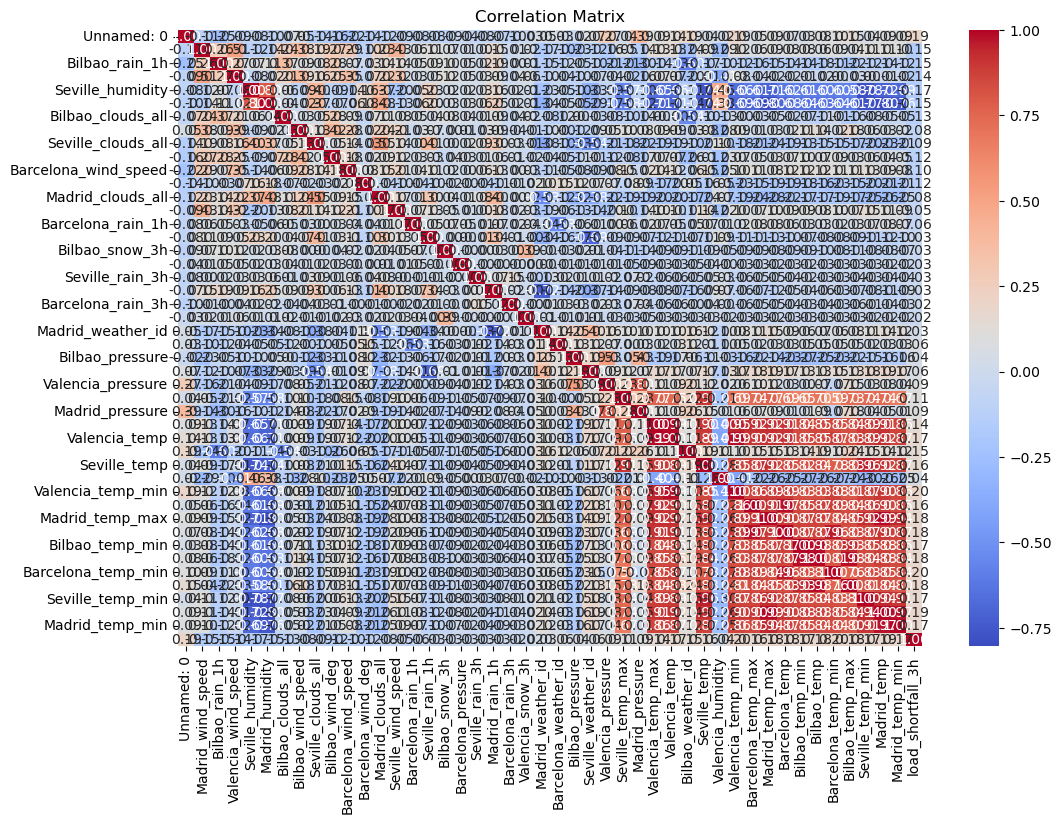

In [6]:
# evaluate correlation

# Load the DataFrame
df = pd.read_csv('df_train.csv')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


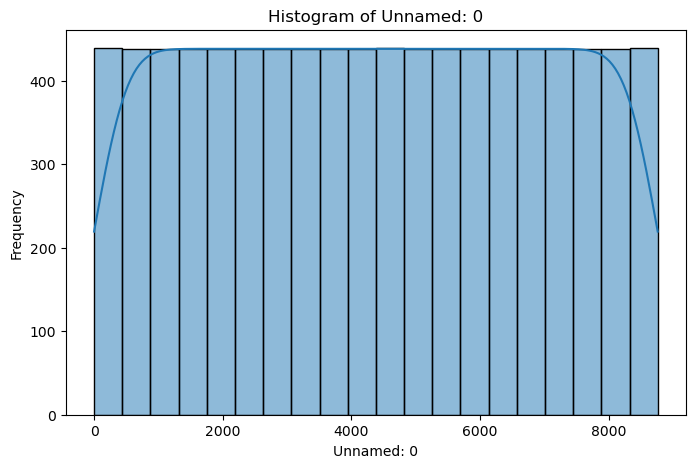

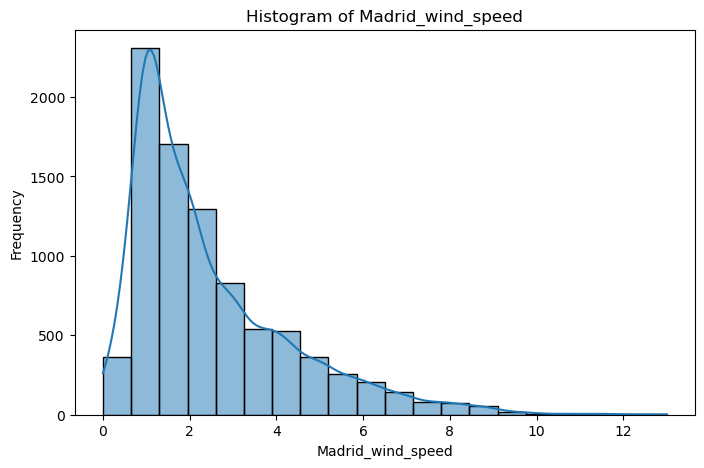

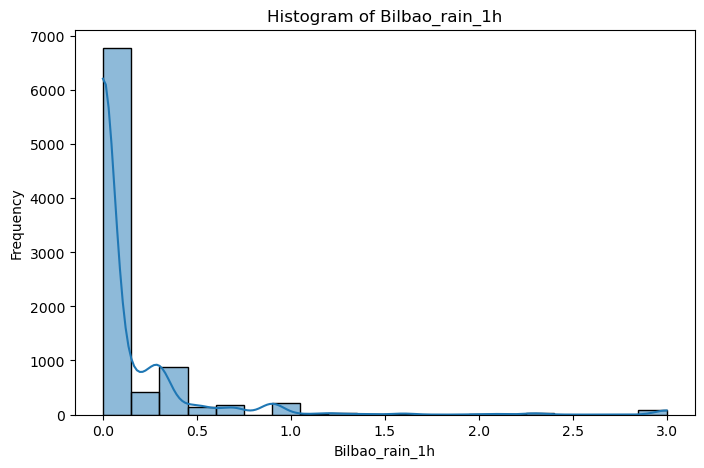

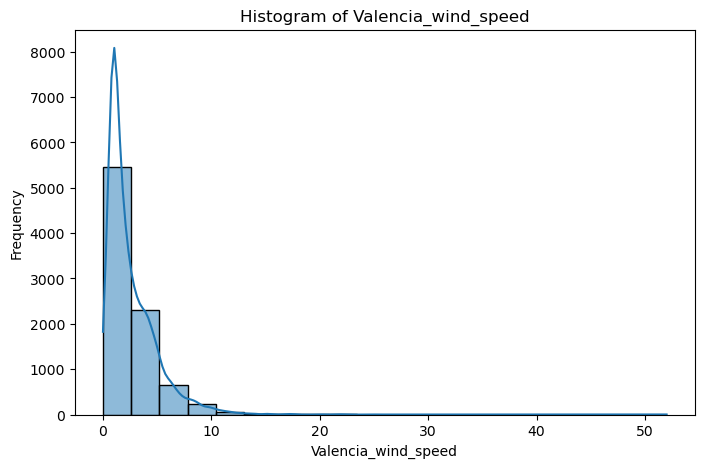

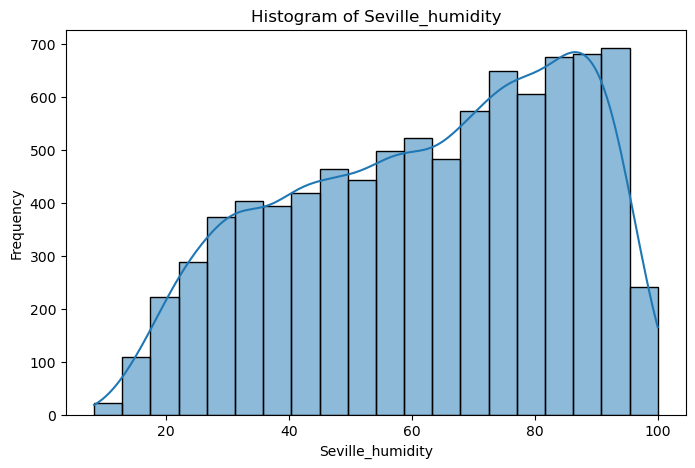

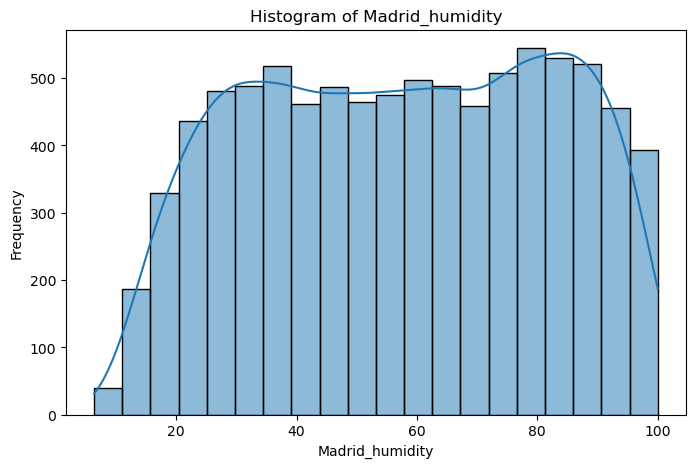

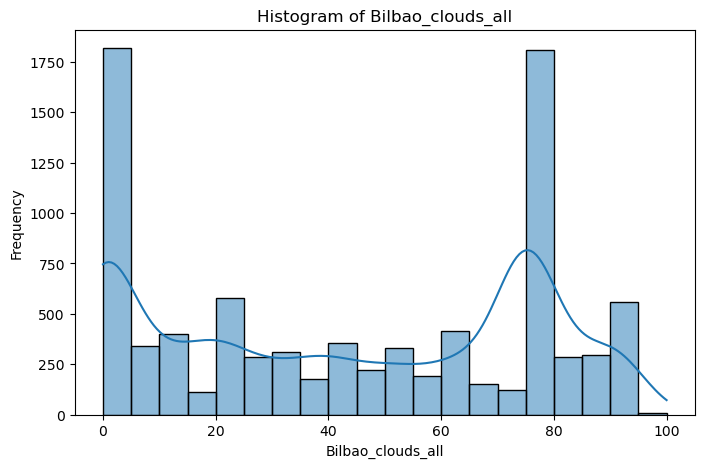

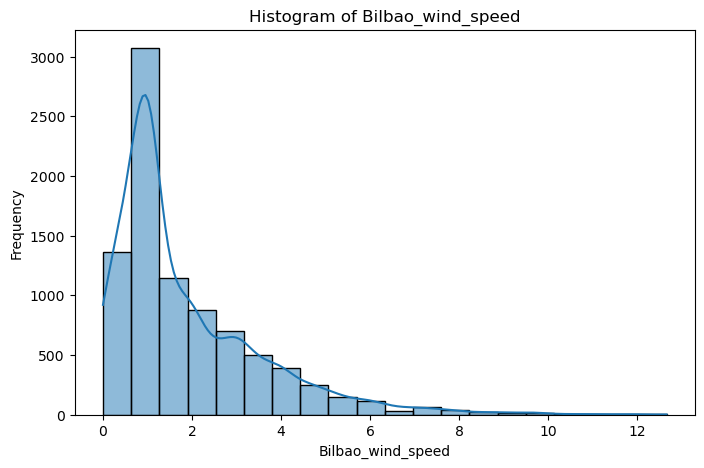

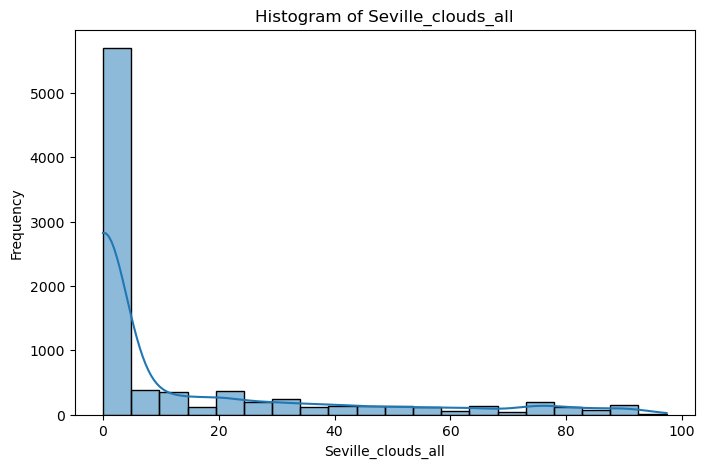

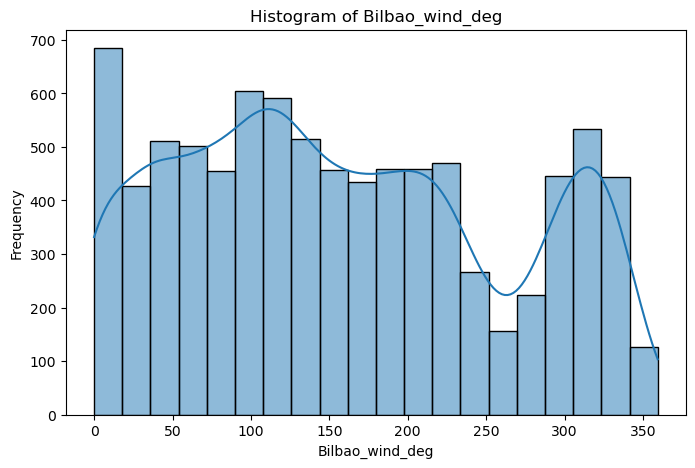

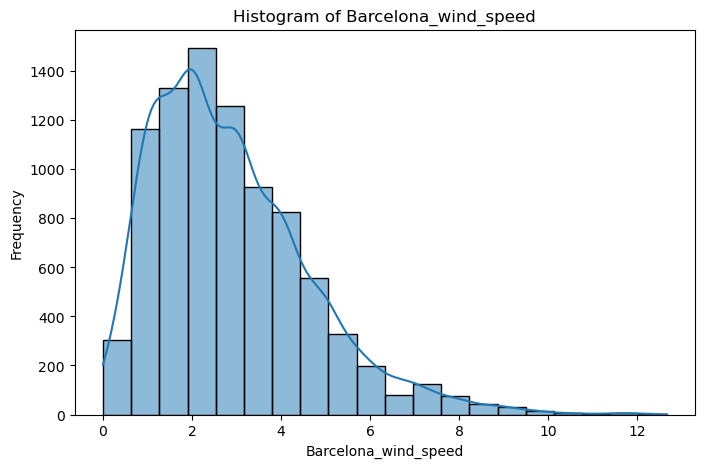

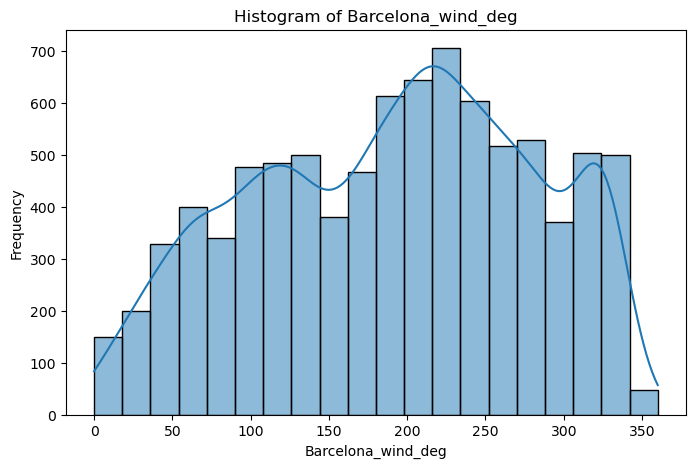

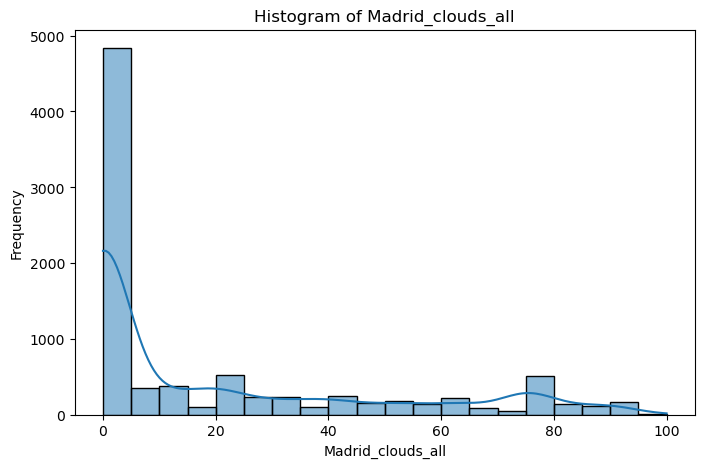

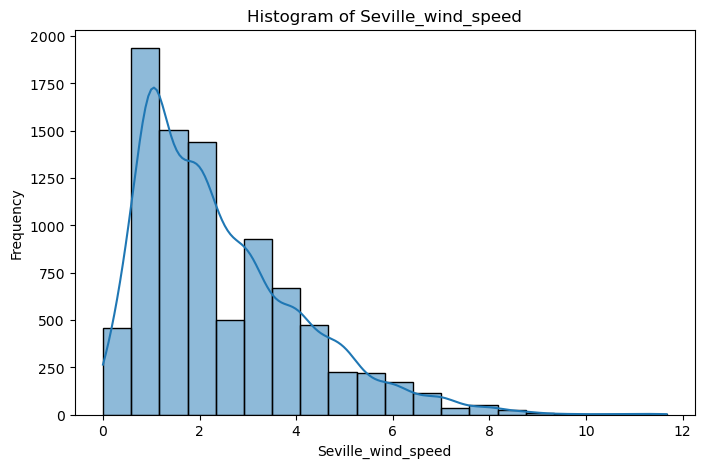

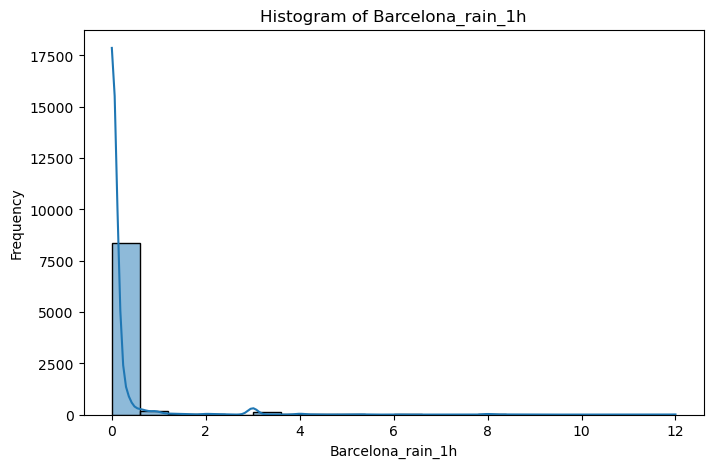

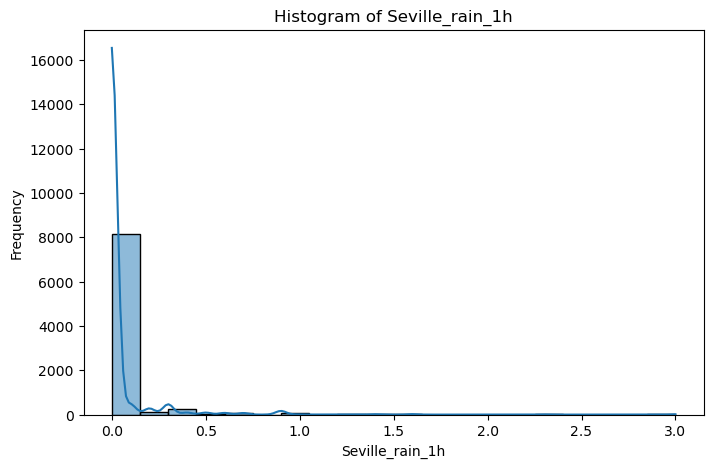

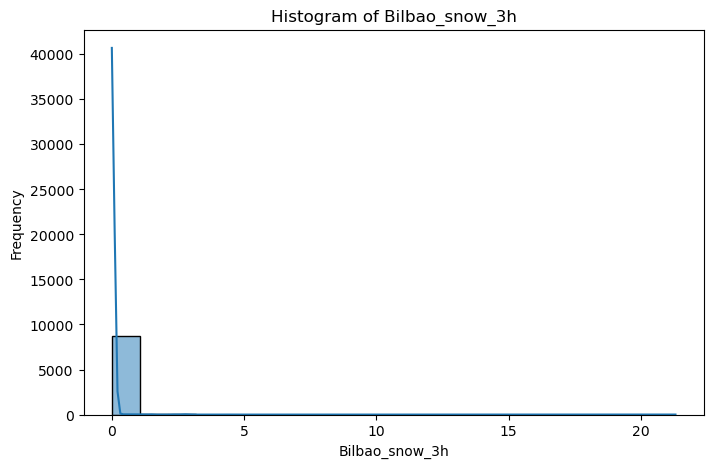

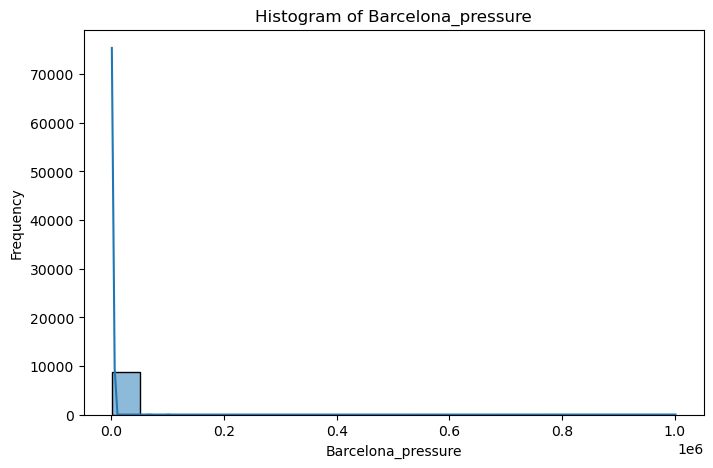

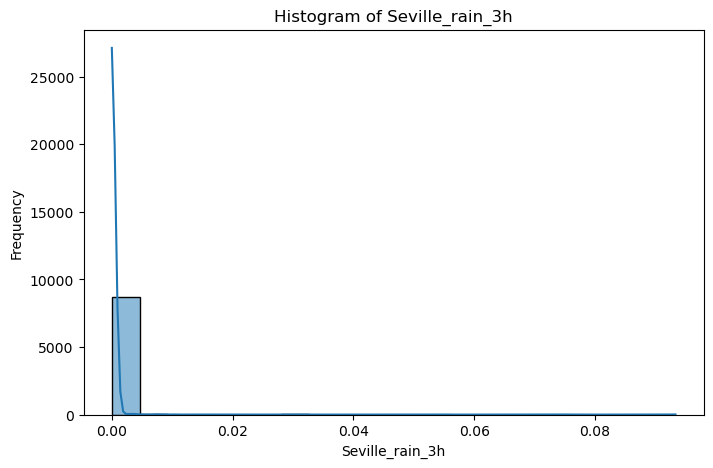

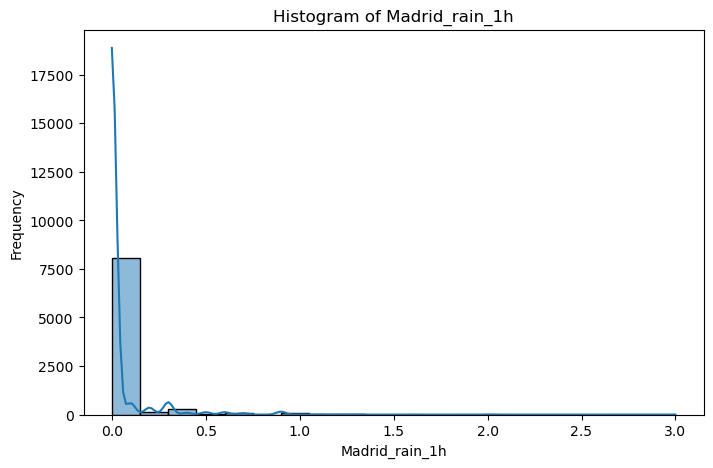

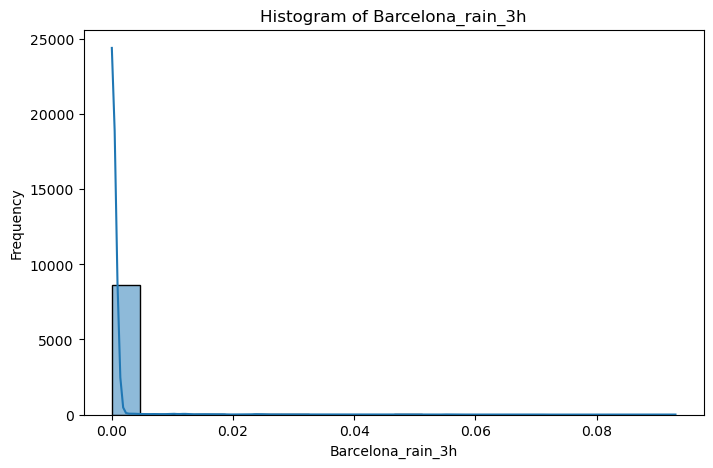

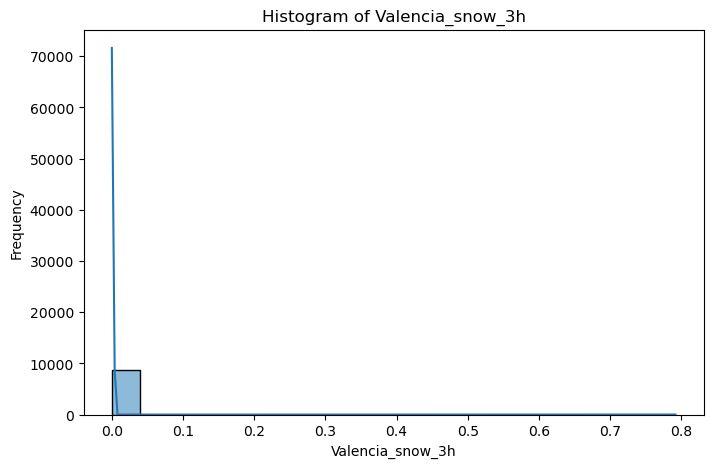

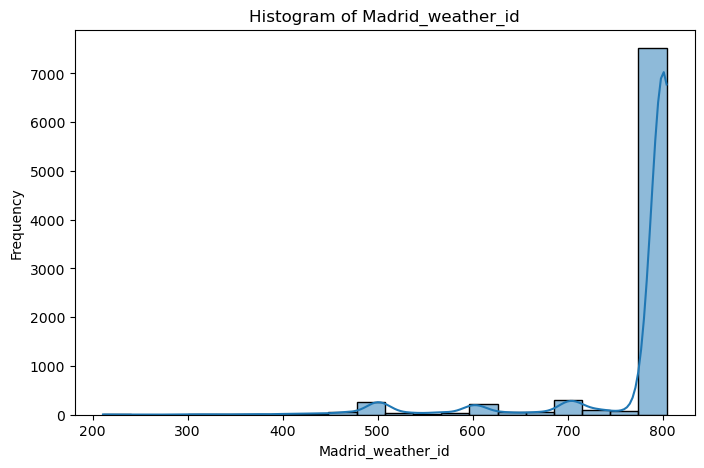

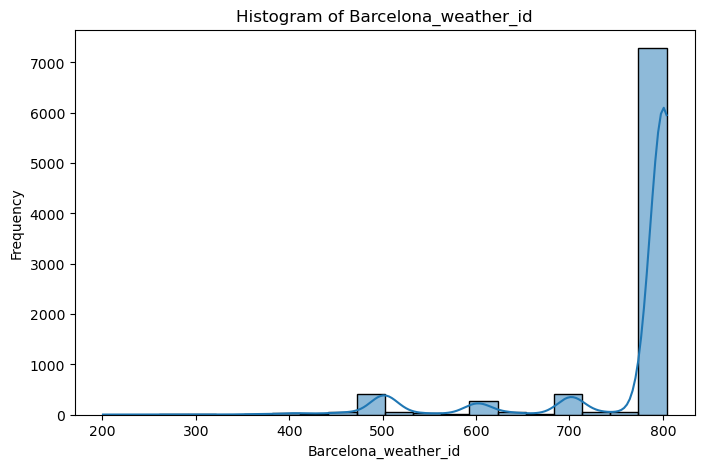

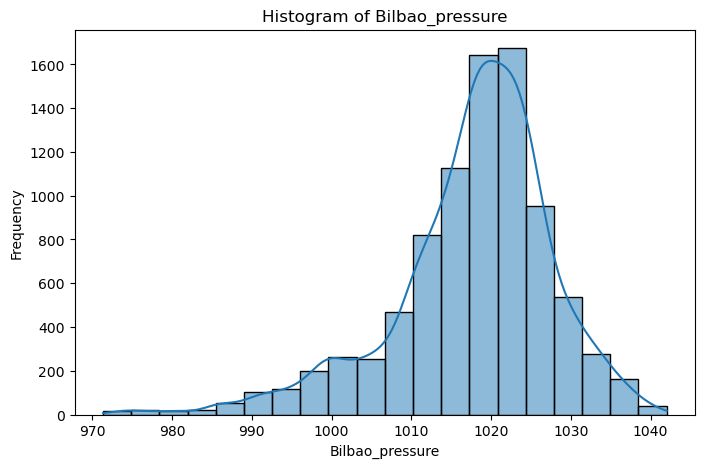

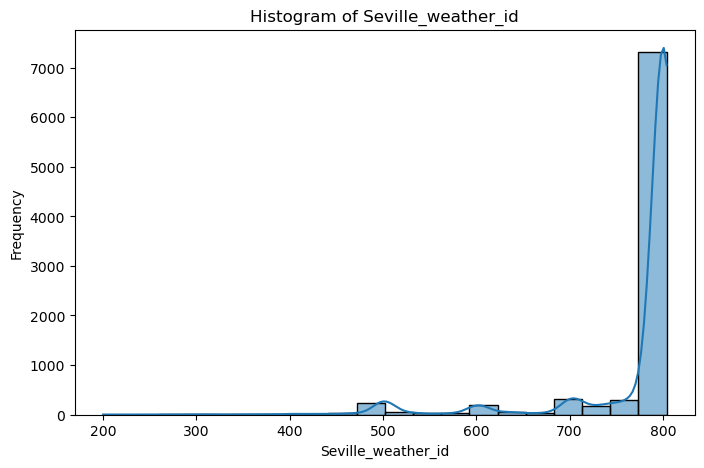

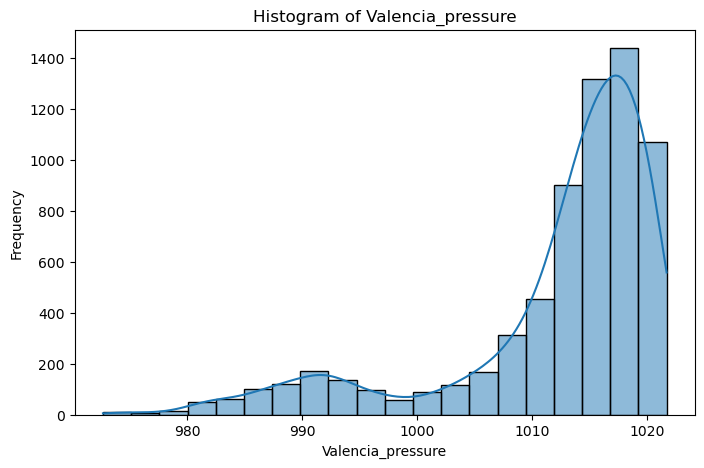

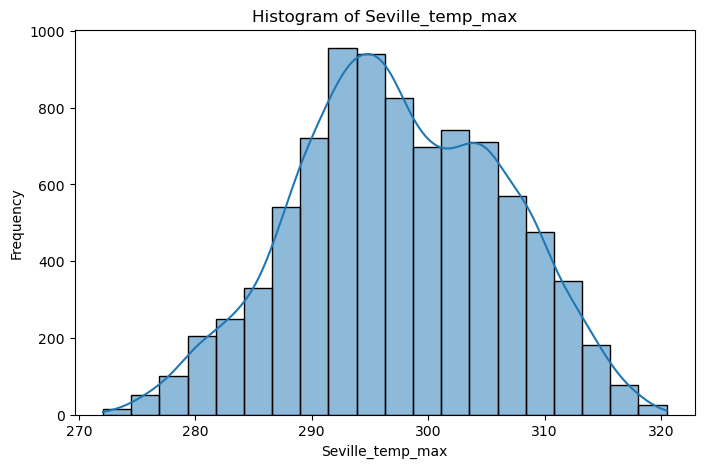

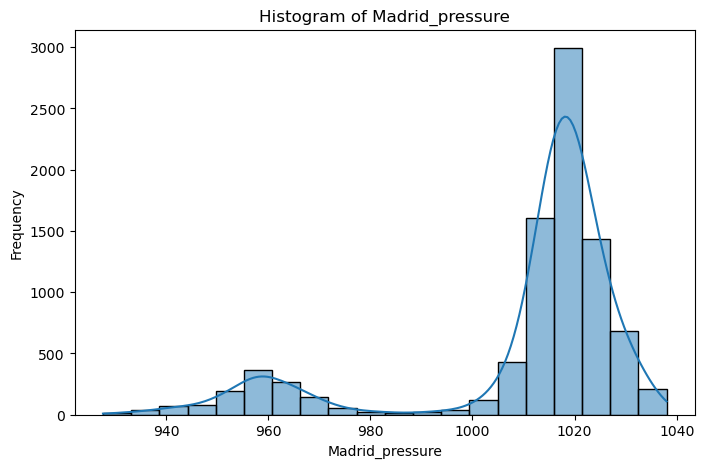

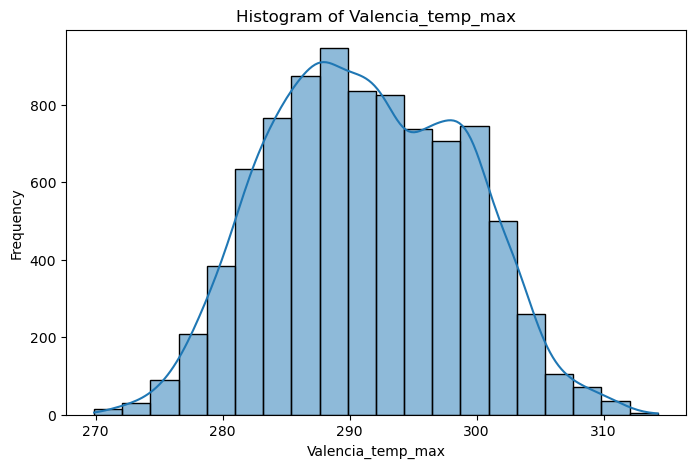

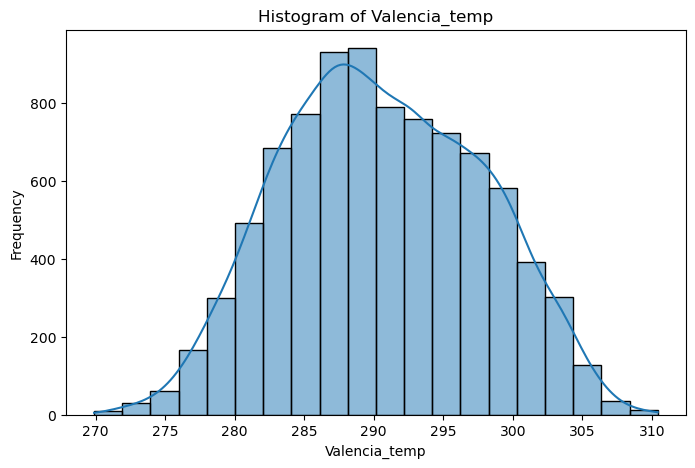

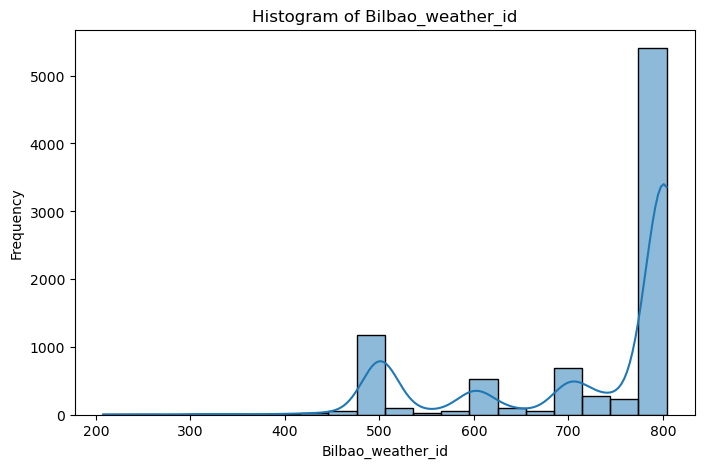

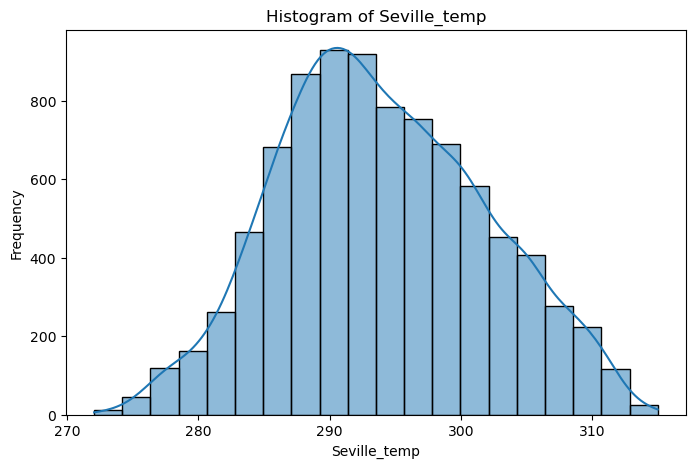

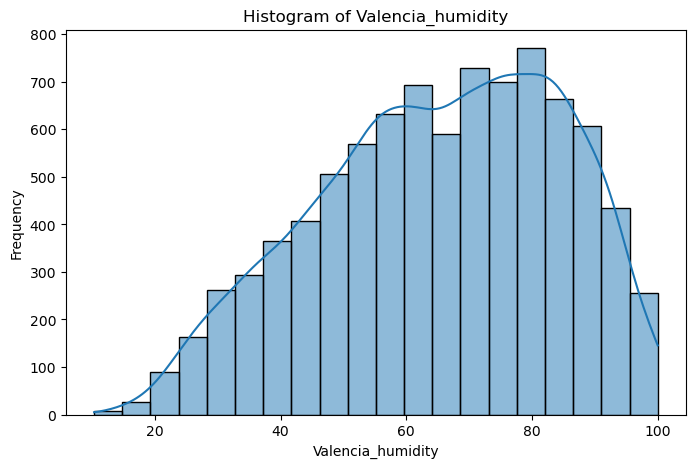

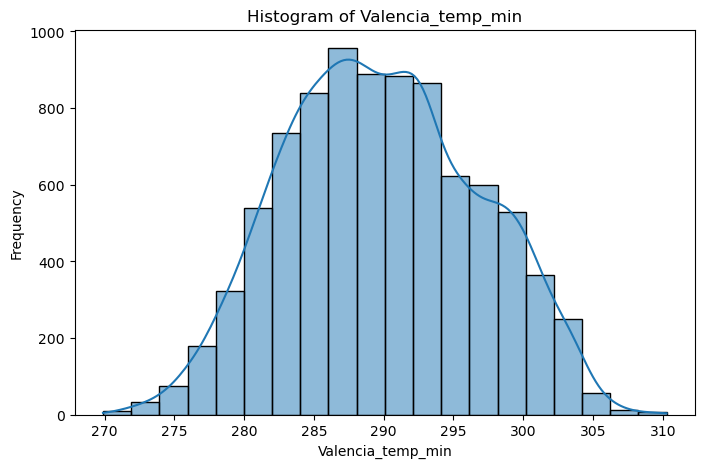

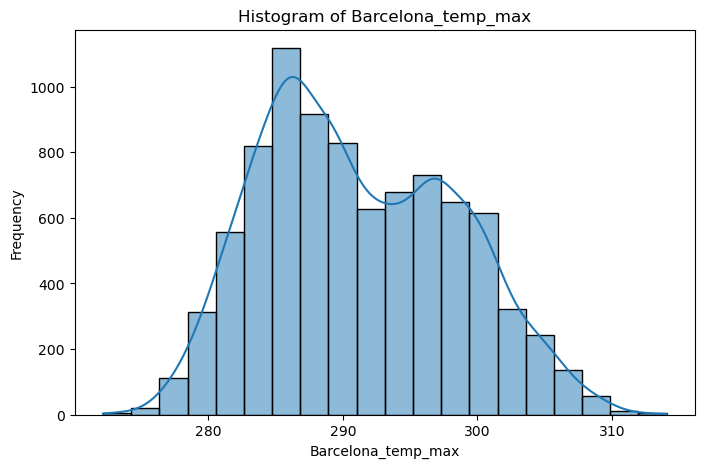

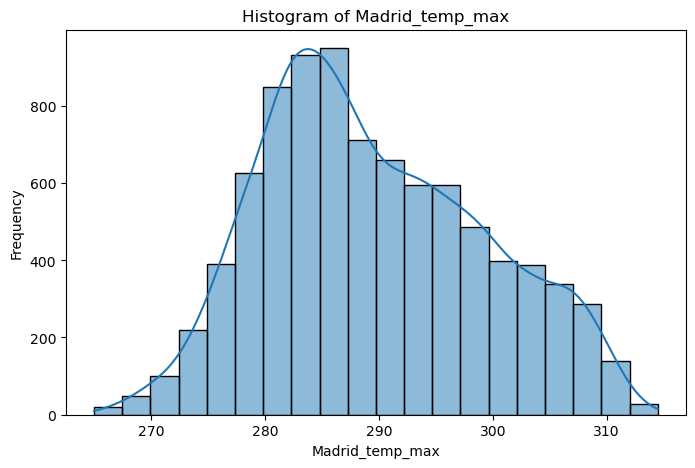

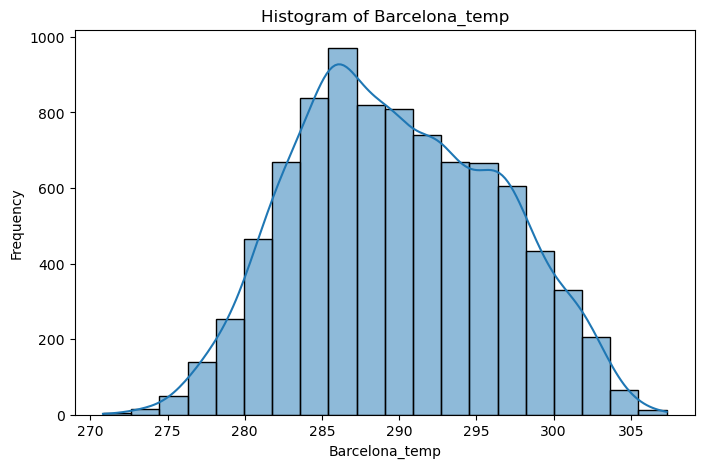

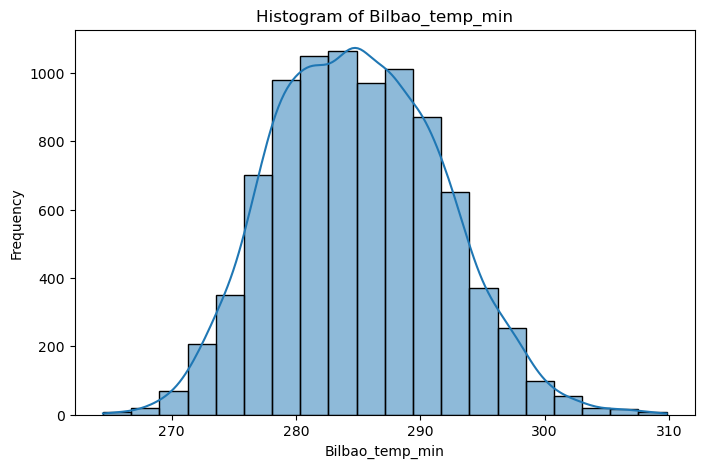

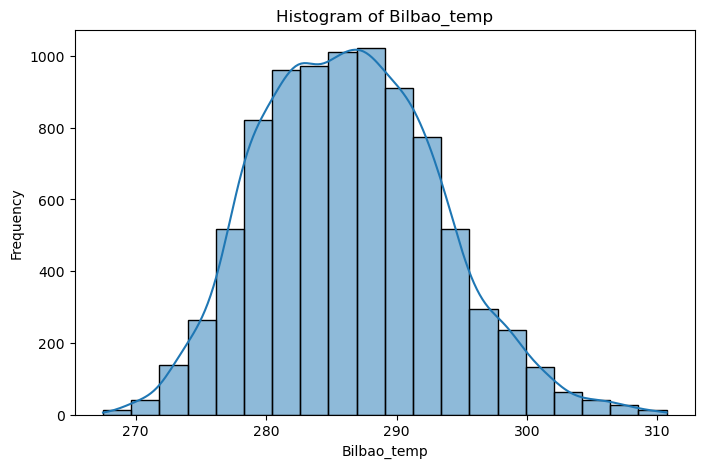

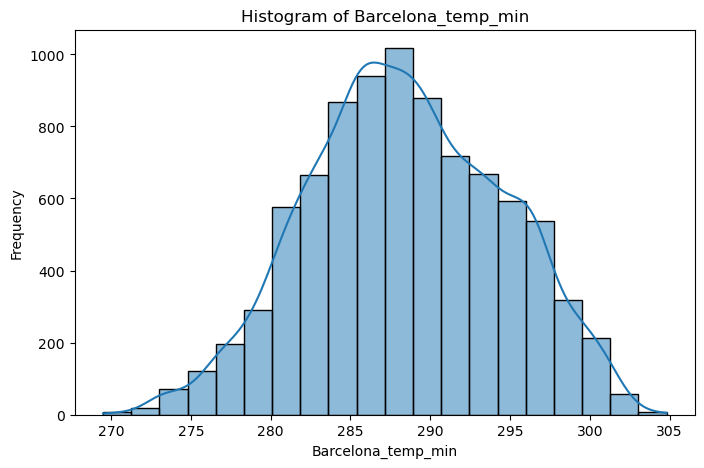

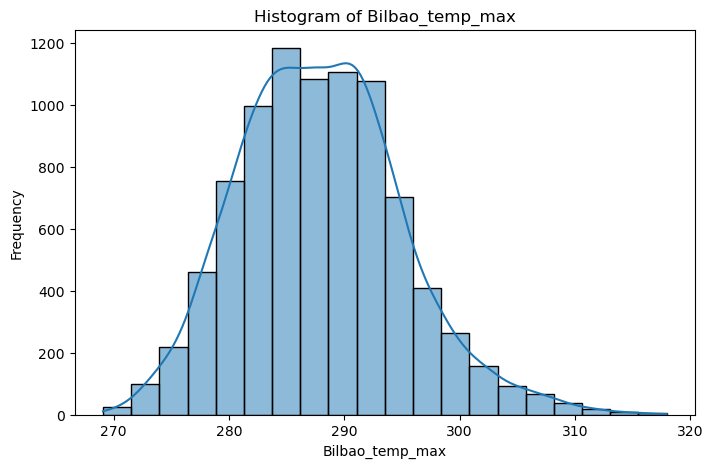

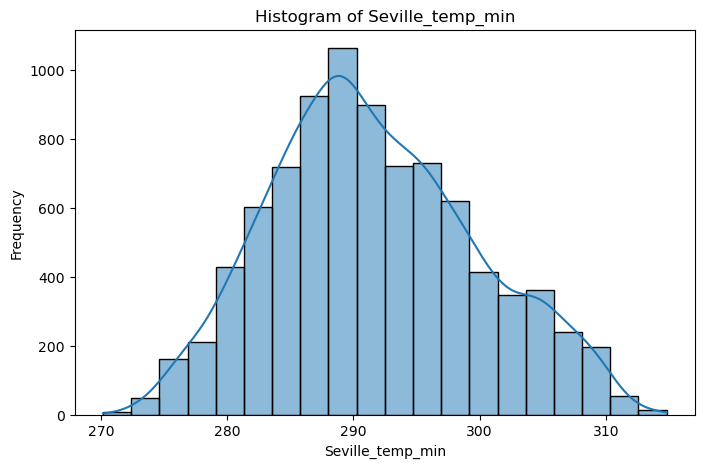

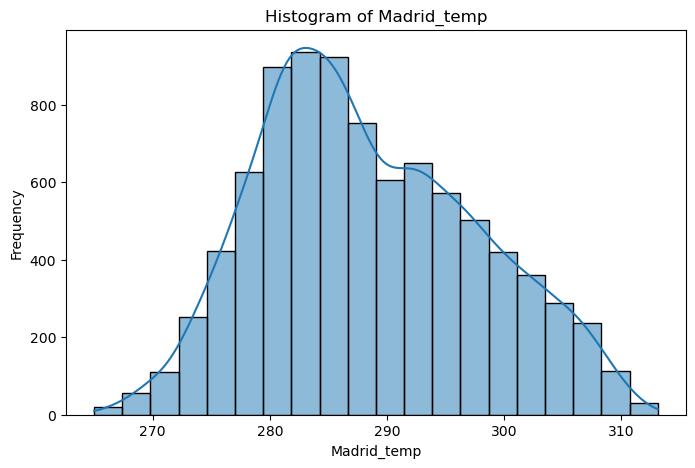

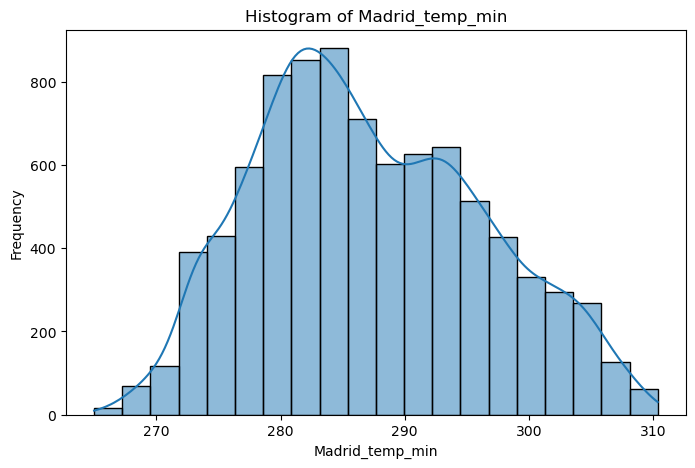

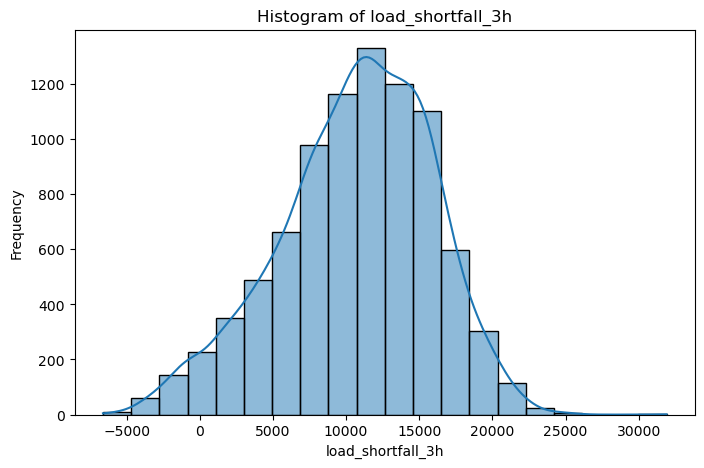

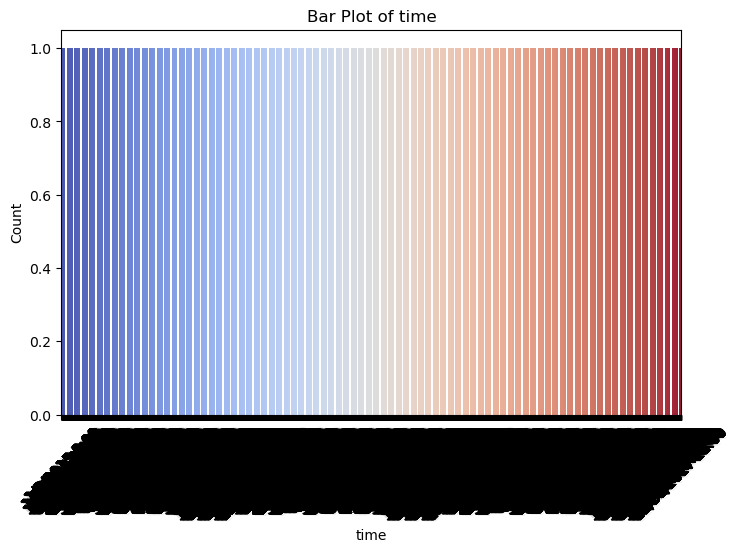

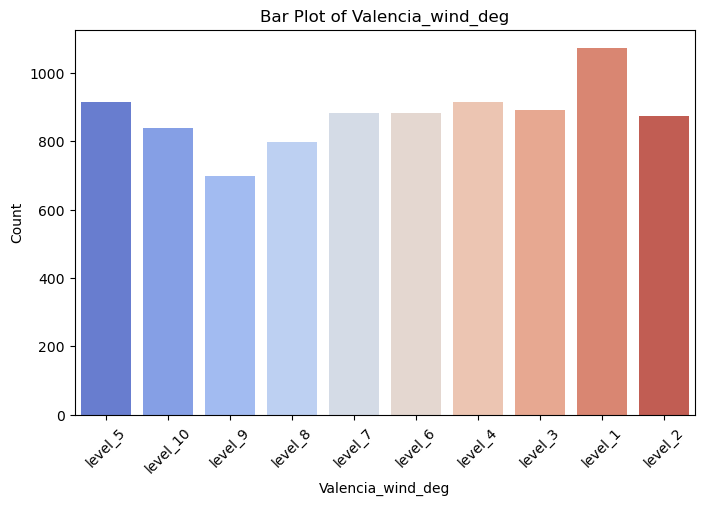

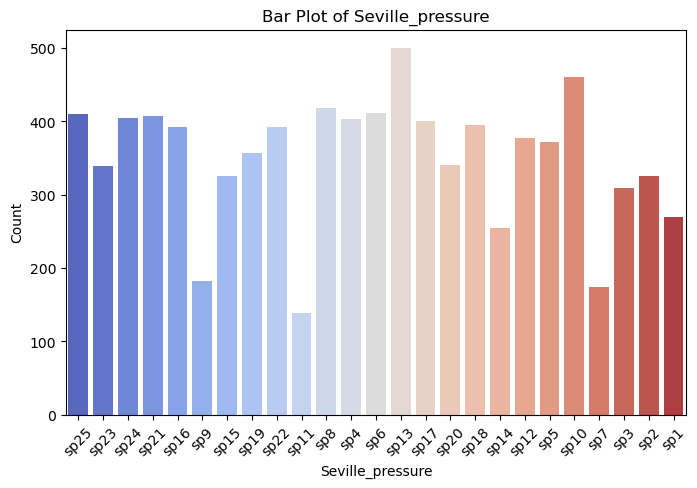

In [25]:
# have a look at feature distributions

# Load the DataFrame
df = pd.read_csv('df_train.csv')

# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, palette='coolwarm')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [7]:
# remove missing values/ features

# Load the DataFrame
df = pd.read_csv('df_train.csv')

# Remove rows with missing values
df_cleaned_rows = df.dropna()

# Remove columns with missing values
df_cleaned_cols = df_cleaned_rows.dropna(axis=1)

# Remove rows where all values are missing
df_cleaned_rows_all = df_cleaned_cols.dropna(how='all')

# Remove columns where all values are missing
df_cleaned_final = df_cleaned_rows_all.dropna(axis=1, how='all')

# Save the cleaned DataFrame to a new CSV file
df_cleaned_final.to_csv('df_train_cleaned.csv', index=False)

# Display the first 10 rows of the cleaned DataFrame
print(df_cleaned_final.head(10))

    Unnamed: 0            time  Madrid_wind_speed Valencia_wind_deg  \
0            0   1/1/2015 3:00           0.666667           level_5   
1            1   1/1/2015 6:00           0.333333          level_10   
2            2   1/1/2015 9:00           1.000000           level_9   
3            3  1/1/2015 12:00           1.000000           level_8   
6            6  1/1/2015 21:00           1.000000           level_8   
7            7   1/2/2015 0:00           1.000000           level_9   
8            8   1/2/2015 3:00           1.000000           level_9   
9            9   1/2/2015 6:00           1.000000           level_9   
10          10   1/2/2015 9:00           1.000000           level_9   
11          11  1/2/2015 12:00           1.000000           level_9   

    Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0              0.0             0.666667         74.333333        64.000000   
1              0.0             1.666667         78.333333     

In [8]:
# Load the cleaned DataFrame
df_cleaned = pd.read_csv('df_train_cleaned.csv')

# Create new features
df_cleaned['new_feature'] = df_cleaned['Madrid_humidity'] + df_cleaned['Madrid_wind_speed']

# Display the first 10 rows of the DataFrame
print(df_cleaned.head(10))

   Unnamed: 0            time  Madrid_wind_speed Valencia_wind_deg  \
0           0   1/1/2015 3:00           0.666667           level_5   
1           1   1/1/2015 6:00           0.333333          level_10   
2           2   1/1/2015 9:00           1.000000           level_9   
3           3  1/1/2015 12:00           1.000000           level_8   
4           6  1/1/2015 21:00           1.000000           level_8   
5           7   1/2/2015 0:00           1.000000           level_9   
6           8   1/2/2015 3:00           1.000000           level_9   
7           9   1/2/2015 6:00           1.000000           level_9   
8          10   1/2/2015 9:00           1.000000           level_9   
9          11  1/2/2015 12:00           1.000000           level_9   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667  

In [9]:
# engineer existing features

# Load the cleaned DataFrame
df_cleaned_final = pd.read_csv('df_train_cleaned.csv')

# Engineer existing features
df_cleaned_final['Seville_new_feature'] = df_cleaned_final['Seville_humidity'] * df_cleaned_final['Seville_temp_min']
df_cleaned_final['Bilbao_wind_speed_new_feature'] = df_cleaned_final['Bilbao_wind_speed'] + df_cleaned_final['Bilbao_rain_1h']



# Save the engineered DataFrame to a new CSV file
df_cleaned_final.to_csv('df_train_cleaned_engineered.csv', index=False)

# Display the first 10 rows of the engineered DataFrame
print(df_cleaned_final.head(10))

   Unnamed: 0            time  Madrid_wind_speed Valencia_wind_deg  \
0           0   1/1/2015 3:00           0.666667           level_5   
1           1   1/1/2015 6:00           0.333333          level_10   
2           2   1/1/2015 9:00           1.000000           level_9   
3           3  1/1/2015 12:00           1.000000           level_8   
4           6  1/1/2015 21:00           1.000000           level_8   
5           7   1/2/2015 0:00           1.000000           level_9   
6           8   1/2/2015 3:00           1.000000           level_9   
7           9   1/2/2015 6:00           1.000000           level_9   
8          10   1/2/2015 9:00           1.000000           level_9   
9          11  1/2/2015 12:00           1.000000           level_9   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667  

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [10]:
# split data
# Load the cleaned and engineered DataFrame
df_cleaned_final = pd.read_csv('df_train_cleaned_engineered.csv')

# Preprocess datetime columns
df_cleaned_final['time'] = pd.to_datetime(df_cleaned_final['time'])
df_cleaned_final['year'] = df_cleaned_final['time'].dt.year
df_cleaned_final['month'] = df_cleaned_final['time'].dt.month
df_cleaned_final['day'] = df_cleaned_final['time'].dt.day
df_cleaned_final['hour'] = df_cleaned_final['time'].dt.hour


# Define features (X) and target variable (y)
X = df_cleaned_final.drop(columns=['time', 'load_shortfall_3h'])
y = df_cleaned_final['load_shortfall_3h']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5356, 53) (5356,)
Testing set shape: (1339, 53) (1339,)


In [15]:
# create targets and features dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'df_cleaned_final' is your DataFrame with cleaned and engineered features
# Assuming 'load_shortfall_3h' is your target variable

# Define features (X) and target variable (y)
X = df_cleaned_final.drop(columns=['load_shortfall_3h', 'time'])  # Exclude Timestamp columns
y = df_cleaned_final['load_shortfall_3h']

# Define numeric features for scaling (excluding Timestamp columns)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# Drop non-numeric columns if necessary
X = df_cleaned_final.select_dtypes(include=['float64', 'int64'])

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Define target variable (y)
y = df_cleaned_final['load_shortfall_3h']

# Define a column transformer to scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3.564652672637968e-23
R-squared Score: 1.0


In [18]:
# create one or more ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Define a list of models to try
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Iterate over the models
for model in models:
    print("Model:", model.__class__.__name__)
    # Train the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Convert the scores to positive values
    scores = -scores
    # Print the mean squared error
    print("Mean Squared Error:", scores.mean())
    
    # Calculate and print the R-squared score
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print("R-squared Score:", r2_scores.mean())
    print()


Model: LinearRegression
Mean Squared Error: 2.0877343105058266e-22
R-squared Score: 1.0

Model: DecisionTreeRegressor
Mean Squared Error: 13122.039987126982
R-squared Score: 0.9994695439098524

Model: RandomForestRegressor
Mean Squared Error: 12166.508484965507
R-squared Score: 0.9995800658072177



In [19]:
# evaluate one or more ML models


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Train the model using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values
mse_scores = -scores

# Print the mean squared error and R-squared score
print("Mean Squared Error:", mse_scores.mean())
print("R-squared Score:", cross_val_score(model, X_train, y_train, cv=5).mean())


Mean Squared Error: 2.0877343105058266e-22
R-squared Score: 1.0


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [25]:
# Compare model performance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a dictionary to store the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print()

# Select the best performing model based on the MSE
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test)))
print(f"Best Model: {best_model_name}")
df.to_csv('data.csv', index=False)


# The Random Forest model is selected as the best model based on the mean squared error (MSE) on the holdout dataset. 
# Here are some reasons why Random Forest might outperform the other models in this scenario:
# Random Forest is an ensemble method that combines the predictions of multiple individual decision trees. This ensemble 
# approach often leads to better performance compared 
# to a single decision tree, especially when dealing with complex datasets.
# Random Forest can handle missing values in the dataset, which can simplify the data preprocessing step.
# Overall, the Random Forest model's ability to reduce overfitting, capture non-linear relationships, and provide robust
# performance makes it a suitable choice for many regression tasks. 

Model: Linear Regression
Mean Squared Error: 1.0987604994475965e-22
R-squared Score: 1.0

Model: Decision Tree
Mean Squared Error: 2561.4247821840386
R-squared Score: 0.999908551438389

Model: Random Forest
Mean Squared Error: 1918.8386765175594
R-squared Score: 0.9999314931915426

Best Model: Linear Regression


In [23]:
# Choose best model and motivate why it is the best choice
# Select the best performing model based on the MSE
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test)))
print(f"Best Model: {best_model_name}")

# The Random Forest model is selected as the best model based on the mean squared error (MSE) on the holdout dataset. 
# Here are some reasons why Random Forest might outperform the other models in this scenario:
# Random Forest is an ensemble method that combines the predictions of multiple individual decision trees. This ensemble 
# approach often leads to better performance compared 
# to a single decision tree, especially when dealing with complex datasets.
# Random Forest can handle missing values in the dataset, which can simplify the data preprocessing step.
# Overall, the Random Forest model's ability to reduce overfitting, capture non-linear relationships, and provide robust
# performance makes it a suitable choice for many regression tasks. 
df.to_csv('data.csv', index=False)

Best Model: Linear Regression


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [22]:
# discuss chosen methods logic

# The Random Forest model is a powerful machine learning technique that works by building a "forest" of decision trees during 
# training and then using these trees to make predictions.

# Here's a simple explanation of how the Random Forest model works:

# Building the Forest:

# The Random Forest algorithm starts by creating a "forest" of decision trees.
# Each tree is trained on a random subset of the training data and uses a random subset of the features.
# This randomness helps to ensure that each tree in the forest is different from the others, reducing the risk of overfitting.
# Making Predictions:

# To make a prediction, the Random Forest model first passes the input data through each of the trees in the forest.
# Each tree independently predicts the target variable based on the input data.
# For regression tasks, the final prediction is usually the average of all the individual tree predictions.
# For classification tasks, the final prediction is typically the mode (most common class) of all the individual tree predictions.
# Feature Importance:

# One of the advantages of the Random Forest model is that it provides a measure of feature importance.
# This measure indicates how much each feature contributes to the model's predictions.
# Features that are frequently used in the decision trees to make splits are considered more important.
# Handling Overfitting:

# Random Forest is less prone to overfitting compared to a single decision tree because it averages the predictions of many trees.
# This helps to smooth out the predictions and make the model more robust to noise in the data.
# In summary, the Random Forest model works by creating a collection of decision trees, each trained on a random subset of the 
# ata, and then combines the predictions of these trees to make more accurate and robust predictions.
